# 확률적 경사 하강법

1. 점진적 학습 또는 온라인 학습 
2. 확율적 : 무작위, 랜덤하게 의 기술적 표현 
3. 하강법 : 경사를 내려가는 방법 
4. 경사 : 기울기 
5. 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. 
이처럼 훈련 세트에서 랜덤하게 하나의 샘픙릉 로그는 것이 확율적 경사 하강법이다. 

6. 훈련 세트에서 랜덤하게 또 ㅎ다른 샘플을 하나 선택하여 경사를 조금 내려간다. 
이런식으로 전체 샘플을 모두 사용 할때 까지 계속한다. 
7. 만족할만한 위치에 도달할 때까지 위의 과정을 반복하는 것을 애포크(epoch)라고 한다. 
8. 종류 
 - 확률적 경사 하강법 : 샘플을 1개씩 꺼내서 경사를 조금씩 이동 
 - 미니배치 경사 하강법 : 샘플을 여러개 꺼내서 경사를 조금씩 이동 
 - 배치 경사 하강법 : 몽땅 꺼내서 경사를 조금씩 이동 
 
9.손실함수(loss function) : 산 
 - 값이 작을 수록 좋다. 
 - 샘플 하나에 대한 손실을 정의 
10. 비용함수(cost function)
 - 훈련 세트에 있는 모든 샘플에 대한 손실 함수 의 합 
 
11. 로지스틱 손실 함수 


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
#확률적 경사 
from sklearn.linear_model import SGDClassifier

In [6]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/Users/sl/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

과대적합 에포크 횟수가 부족하면 과소적합이 될 가능성이 높다
과대적합 에포크 횟수가 증가하면 과재적합이 될 가능성이 높다. 


In [33]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target) # 입려값에 종류 

In [28]:
for _ in range(0, 300):

    #sc.fit()을 먼저 수행 하지 않으면 
    #파라미터 classes 를 받드시 지정해야한다.
    
    sc.partial_fit(train_scaled,train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

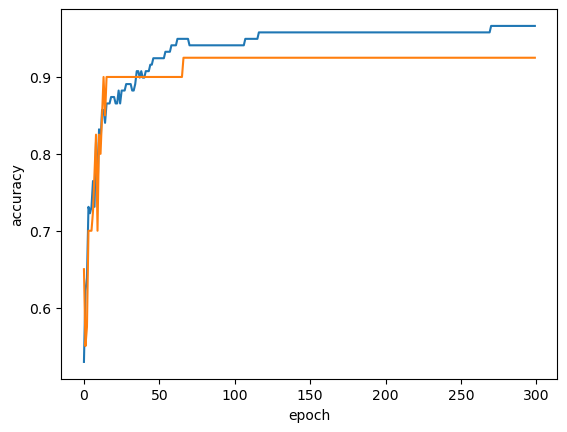

In [29]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [34]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [35]:
#: 힌지 손실(hinge loss), SVM(support vector machine )
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [36]:
train_score = []
test_score = []

classes = np.unique(train_target) # 입려값에 종류 


for _ in range(0, 300):

    #sc.fit()을 먼저 수행 하지 않으면 
    #파라미터 classes 를 받드시 지정해야한다.
    
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

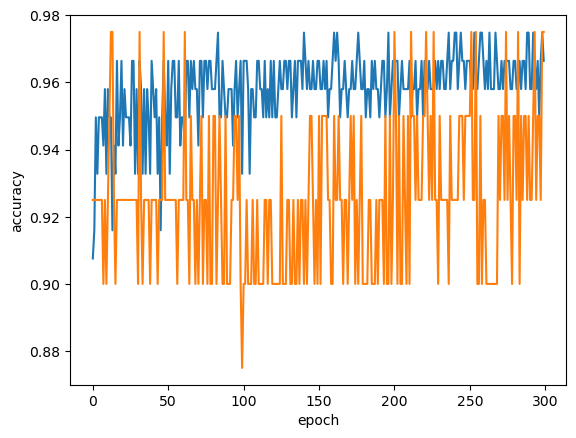

In [37]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()